<a href="https://colab.research.google.com/github/Carlosrnes/group_work_ml/blob/main/ML_Group_work_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# 1. Prepare Problem
# a) Load libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# b) Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Carlosrnes/group_work_ml/main/techscape-ecommerce/train.csv')

# Drop Access_ID
df = df.drop(['Access_ID'], axis=1)

# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

filters1 = (
    (df['AccountMng_Duration']<=2000)
    &
    (df['FAQ_Duration']<=1500)
    &
    (df['Product_Pages']<=500)
    &
    (df['Product_Duration']<=25000)
    &
    (df['GoogleAnalytics_PageValue']<=300)
)

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

df = df[filters1]

# Creating new features
df['month'] = df['Date'].dt.month

# Dropping columns
df = df.drop(['Date'], axis=1).reset_index(drop=True)

# One-hot encoding
df = pd.concat([df,pd.get_dummies(df['month'], prefix='month_',dummy_na=True)],axis=1).drop(['month'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Type_of_Traffic'], prefix='Type_of_Traffic_',dummy_na=True)],axis=1).drop(['Type_of_Traffic'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Browser'], prefix='Browser_',dummy_na=True)],axis=1).drop(['Browser'],axis=1)

df = pd.concat([df,pd.get_dummies(df['OS'], prefix='OS_',dummy_na=True)],axis=1).drop(['OS'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Country'], prefix='Country_',dummy_na=True)],axis=1).drop(['Country'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Type_of_Visitor'], prefix='Type_of_Visitor_',dummy_na=True)],axis=1).drop(['Type_of_Visitor'],axis=1)

# Sampling
dataset = df.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = df.drop(dataset.index).reset_index(drop=True)

print('Data for Modeling: ' + str(dataset.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Percentage of data kept after removing outliers: 0.9973
Data for Modeling: (8975, 74)
Unseen Data For Predictions: (997, 74)


In [3]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
df = dataset.dropna()
df1 = df.drop(['Buy'], axis=1)
array = df1.values
X = array[:,0:df1.shape[1]-1].astype(float)
y = np.array(df['Buy'])
validation_size=0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

In [4]:
# b) Test options and evaluation metric
num_folds = 10
scoring = 'f1'

Defined 32 models
>0logistic: 0.481 (+/-0.041)
>1logistic: 0.500 (+/-0.059)
>2logistic: 0.423 (+/-0.057)
>3logistic: 0.423 (+/-0.057)
>0ridge-0.1: 0.372 (+/-0.053)
>1ridge-0.1: 0.372 (+/-0.053)
>2ridge-0.1: 0.372 (+/-0.053)
>3ridge-0.1: 0.372 (+/-0.053)
>0ridge-0.2: 0.372 (+/-0.053)
>1ridge-0.2: 0.372 (+/-0.053)
>2ridge-0.2: 0.371 (+/-0.051)
>3ridge-0.2: 0.371 (+/-0.051)
>0ridge-0.3: 0.372 (+/-0.052)
>1ridge-0.3: 0.372 (+/-0.053)
>2ridge-0.3: 0.371 (+/-0.051)
>3ridge-0.3: 0.371 (+/-0.051)
>0ridge-0.4: 0.372 (+/-0.052)
>1ridge-0.4: 0.372 (+/-0.053)
>2ridge-0.4: 0.371 (+/-0.051)
>3ridge-0.4: 0.371 (+/-0.051)
>0ridge-0.5: 0.372 (+/-0.052)
>1ridge-0.5: 0.372 (+/-0.053)
>2ridge-0.5: 0.371 (+/-0.051)
>3ridge-0.5: 0.371 (+/-0.051)
>0ridge-0.6: 0.371 (+/-0.051)
>1ridge-0.6: 0.372 (+/-0.053)
>2ridge-0.6: 0.371 (+/-0.051)
>3ridge-0.6: 0.371 (+/-0.051)
>0ridge-0.7: 0.371 (+/-0.051)
>1ridge-0.7: 0.372 (+/-0.053)
>2ridge-0.7: 0.368 (+/-0.051)
>3ridge-0.7: 0.368 (+/-0.051)
>0ridge-0.8: 0.371 (+/-0.0

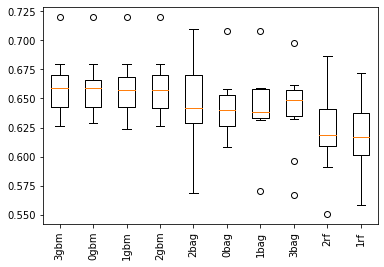

In [5]:
# c) Spot Check Algorithms

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # linear models
    models['logistic'] = LogisticRegression()
    alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alpha:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
    models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
    models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
    # non-linear models
    n_neighbors = range(1, 12)
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
    models['cart'] = DecisionTreeClassifier()
    models['extra'] = ExtraTreeClassifier()
    #models['svml'] = SVC(kernel='linear')
    #models['svmp'] = SVC(kernel='poly')
    #c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    #for c in c_values:
    #    models['svmr'+str(c)] = SVC(C=c)
    models['bayes'] = GaussianNB()
    # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
    models['bag'] = BaggingClassifier(n_estimators=n_trees)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models
 
# no transforms pipeline
def pipeline_none(model):
    return model
 
# standardize transform pipeline
def pipeline_standardize(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline
 
# normalize transform pipeline
def pipeline_normalize(model):
    steps = list()
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline
 
# standardize and normalize pipeline
def pipeline_std_norm(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric, pipe_func):
    # create the pipeline
    pipeline = pipe_func(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores
 
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric, pipe_func):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric, pipe_func)
    except:
        scores = None
    return scores
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, pipe_funcs, folds=num_folds, metric=scoring):
    results = dict()
    for name, model in models.items():
        # evaluate model under each preparation function
        for i in range(len(pipe_funcs)):
            # evaluate the model
            scores = robust_evaluate_model(X, y, model, folds, metric, pipe_funcs[i])
            # update name
            run_name = str(i) + name
            # show process
            if scores is not None:
                # store a result
                results[run_name] = scores
                mean_score, std_score = mean(scores), std(scores)
                print('>%s: %.3f (+/-%.3f)' % (run_name, mean_score, std_score))
            else:
                print('>%s: error' % run_name)
    return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    # boxplot for the top n
    plt.boxplot(scores, labels=names)
    _, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.savefig('spotcheck.png')
 
# Run Spot Check Algorithms
# get model list
models = define_models()
# define transform pipelines
pipelines = [pipeline_none, pipeline_standardize, pipeline_normalize, pipeline_std_norm]
# evaluate models
results = evaluate_models(X, y, models, pipelines)
# summarize results
summarize_results(results)

In [6]:
# 5. Improve Accuracy
# a) Algorithm Tuning (Hyperparameters)

# Tune Gradient Boosting Classifier
n_trees = [10,50,100, 200]
learning = [0.001, 0.01, 0.1]
subsample = [0.7, 0.85, 1.0]
max_depth = [3, 7]
param_grid = dict(n_estimators=n_trees, learning_rate=learning, subsample=subsample, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.666761 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.85}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.85}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.85}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.85}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max

Optimal number of features : 28


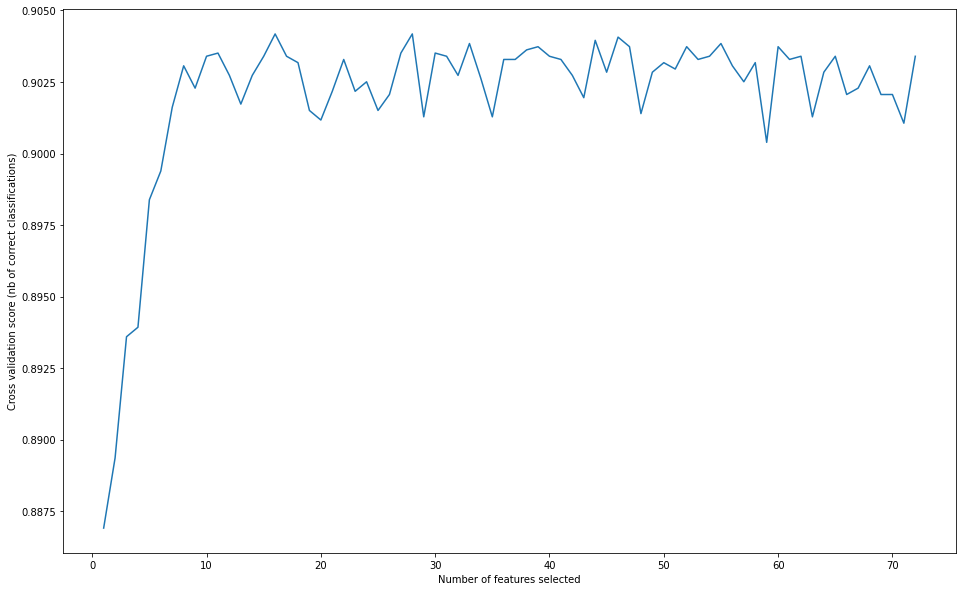

In [13]:
# 6. Feature Selection
# Define model
model_selected = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.85)
features_list = list(df1.columns.values)

# a) Recursive Feature Elimination.
rfecv = RFECV(estimator=model_selected, step=1, cv=kfold, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [16]:
# a) Recursive Feature Elimination.
model = model_selected
rfe = RFE(model, 16)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Feature Ranking: %s" % fit.estimator_)

Num Features: 16
Selected Features: [ True  True  True  True  True  True  True  True  True  True False  True
  True False False False False False  True False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True]
Feature Ranking: [ 1  1  1  1  1  1  1  1  1  1 35  1  1  5 15 10  3 36  1 18 41 14 39 48
  1 27 26 52  2 57  4 19 47 11 53 22 56 12 20 33 42  9 30 34 46 45 55 16
 54 37 31  7 44 17 13  6 40 43 49 50 51 23 21 28 24 29  8 32 38  1 25  1]


In [ ]:
# c) Feature Importance.
model = model_selected
model.fit(X, y)

plt.figure(figsize=(16,10))
importances = pd.DataFrame({'feature': features_list, 'importance': np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=True).set_index('feature')
importances.plot.barh().set_title('Importance of features')

In [25]:
# 7. Finalize Model
# a) Predictions on validation dataset
# prepare the model
model = model_selected
model.fit(X, y)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print('Accuracy:')
print(accuracy_score(Y_validation, predictions))
print('f1-score:')
print(f1_score(Y_validation, predictions))
print('Confusion Matrix:')
print(confusion_matrix(Y_validation, predictions))
print('Classification Report:')
print(classification_report(Y_validation, predictions))

Accuracy:
0.9225626740947075
f1-score:
0.7191919191919193
Confusion Matrix:
[[1478   48]
 [  91  178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1526
           1       0.79      0.66      0.72       269

    accuracy                           0.92      1795
   macro avg       0.86      0.82      0.84      1795
weighted avg       0.92      0.92      0.92      1795

